In [34]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from keras.models import load_model

num_classes = 10
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model_color.h5' #change the name of the saved model accordingly

# The data, split between train and test sets:
_, (x_test, y_test) = cifar10.load_data()
print('x_test shape:', x_test.shape)
print(x_test.shape[0], 'test samples')

'''
#########################################################################
#                    WRITE YOUR CODE HERE                               #
# Convert images to Gray if your saved model is trained with gray       #
#########################################################################
'''
# test_array = np.zeros((10000,32,32,1))
# for i in range(0,x_test.shape[0]):
#      test_array[i,:,:,0] = cv2.cvtColor(x_test[i,:,:,:],cv2.COLOR_BGR2GRAY)
# x_test = test_array

# Convert class vectors to binary class matrices.
y_test = keras.utils.to_categorical(y_test, num_classes)

model = load_model(os.path.join(save_dir,model_name))

x_test_copy = x_test.copy() #Make copy of the original images for displaying

'''
#########################################################################
#                    WRITE YOUR CODE HERE                               #
# Apply normalization if your saved model is trained with normalization #
#########################################################################
'''
# x_train = (x_train/255)-0.5
x_test = (x_test/255)-0.5


x_test = x_test.astype('float32')

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy:', scores[1])





x_test shape: (10000, 32, 32, 3)
10000 test samples
10000/10000 [==============================] - 16s 2ms/step
Test accuracy: 0.7933


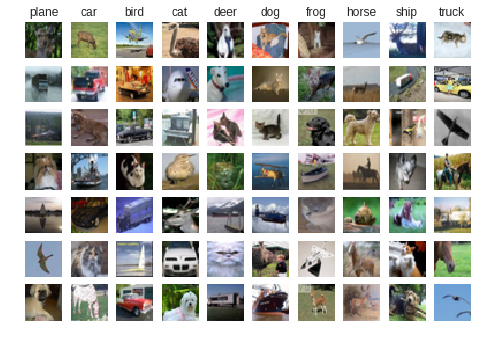

In [35]:
'''
###################################################
#           WRITE YOUR CODE HERE                  #
# Show 7 misclassified samples for each class     #
# This time use model.predict instead, check wiki #
###################################################
'''

# Visualize some examples from the dataset.
# We show a few examples of misclassified images from each class.

#when the index y_test and y_prediction not point the same image, it is misclassified,

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
samples_per_class = 7
num_classes = 10
y_pred = model.predict(x_test)

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(np.argmax(y_test,axis=1) != np.argmax(y_pred,axis=1))#use np.argmax to compare max each other
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        if x_test[idx].shape[-1] == 3:
            plt.imshow(x_test_copy[idx].squeeze().astype('uint8')) #change cmap='gray' when using gray input
        else:
            plt.imshow(x_test_copy[idx].squeeze().astype('uint8'),cmap='gray')

        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()
